First the data needs to be cleaned of extra junk.
This pulls the data and put it into an output folder.

In [26]:
import glob
import re
import matplotlib.pyplot as plt

This function is for later but allows for us to grab page data while removing the extra text that follows. It also has some minor error handling since the formatting of the file tends to vary.

In [27]:
def findBetween(string1,string2):
    """findBetween

    Arguments:
        Str String1: First string match to split between.
        Str String2: Seconds tring to match and split between.
    
    Returns: Data inbetween two matched strings.
    """
    try:
        return l.split(string1)[1].split(string2)[0]
    except:
        return ""

This opens the books folder and reads out all the valid text files. (thanks to glob)
It also loops through these files and removes the extra directory data that glob adds when it pulls it.

In [28]:
books = (glob.glob("data/*.txt"))

bookList = []
for b in books:
    bookList.append(b[5:])

1. The books list that is generated by blob in the beginning is looped through. This lets us cleanly run all the code while changing the book being ran on each time.
2. Each file is opened and its lines are read which is put into a list variable called "data".
3. reducedFile is made which is simply a place for the cleaned data to be appended to for later writing.
4. Each line is read and any line that is just a new line and not any valid data is tossed out.
5. After all of this is complete, the data is written out to a new file into the out directory.

In [29]:
import os

for i in bookList:
    data = open("data/"+i, "r", encoding="utf-8").readlines()
    oldLen = len(data)
    reducedFile = []
    for l in data:
        if l != "\n":
            reducedFile.append(l)
    newLen=len(reducedFile)
    print(i[9:-4]+" is "+str(round(100-(newLen/oldLen*100),2))+"%" + " smaller")
    open("out/"+i,"w+", encoding="utf-8").write("".join(reducedFile))
    #https://www.geeksforgeeks.org/how-to-get-file-size-in-python/
    oldSize = os.stat("out/"+i).st_size
    for d in range(len(reducedFile)):
        if reducedFile[d].startswith("Page | "):
            reducedFile[d] = "Page | "+reducedFile[d].split("Page | ")[1].split(" ")[0]+" "
    open("out/"+i,"w+", encoding="utf-8").write("".join(reducedFile))
    newSize = os.stat("out/"+i).st_size
    print(i[9:-4]+" shrunk from "+str(oldSize)+" bytes to "+str(newSize)+" bytes from page labels being removed.")
            

The Philosopher's Stone is 33.53% smaller
The Philosopher's Stone shrunk from 497189 bytes to 477421 bytes from page labels being removed.
The Chamber of Secrets is 32.86% smaller
The Chamber of Secrets shrunk from 556930 bytes to 535444 bytes from page labels being removed.
The Prisoner of Azkaban is 33.08% smaller
The Prisoner of Azkaban shrunk from 709935 bytes to 681747 bytes from page labels being removed.
The Goblet of Fire is 32.74% smaller
The Goblet of Fire shrunk from 1238984 bytes to 1217857 bytes from page labels being removed.
The Order of the Phoenix is 31.5% smaller
The Order of the Phoenix shrunk from 1684466 bytes to 1625404 bytes from page labels being removed.
The Half Blood Prince is 31.25% smaller
The Half Blood Prince shrunk from 1108300 bytes to 1067775 bytes from page labels being removed.
The Deathly Hallows is 31.83% smaller
The Deathly Hallows shrunk from 1280905 bytes to 1237411 bytes from page labels being removed.


1. Simply checks to see if the line contains any page data. If page data is in that line the line is split through and any non numeric values are removed with "re". (imported at top)
2. This data is added to a bar chart and plotted out for the eye candy. Chart is based on the page count of each book.
3. Grabs the length from before the conversion and after. This then is printed out as a % of how much smaller it is: 100-(newLength/oldLength*100)

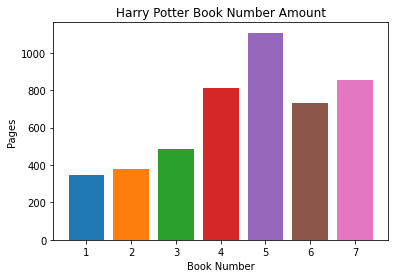

In [30]:
for i in bookList:
    data = open("out/"+i, "r", encoding="utf-8").readlines()
    for l in data:
        if "Page |" in l:
            page = findBetween("Page | ", " ")
            #https://www.adamsmith.haus/python/answers/how-to-remove-all-non-numeric-characters-from-a-string-in-python
            page = re.sub("[^0-9]", "", page)
    plt.bar(i.split("Book ")[1].split(" -")[0],int(page))
plt.xlabel("Book Number")
plt.ylabel("Pages")
plt.title("Harry Potter Book Number Amount")
plt.show()

1. All the books are looped through. The data is read from these book's files and put into the data variable.
2. Creates output list with 5 values set as 0 for later changing.
3. The data is looped through and put into a new variable that has any new lines removed while splitting by any spaces.
4. New data is looped through and added to the output list
5. Data from variable is plotted.

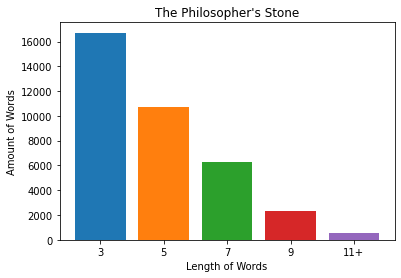

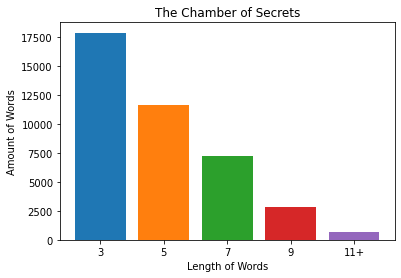

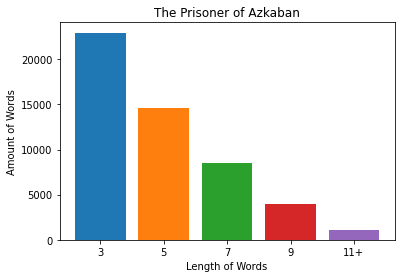

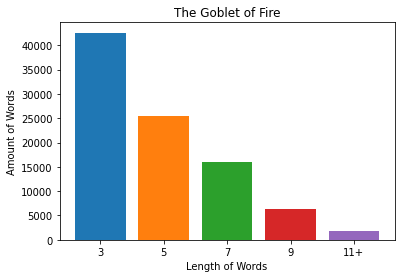

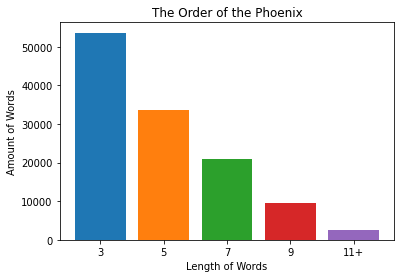

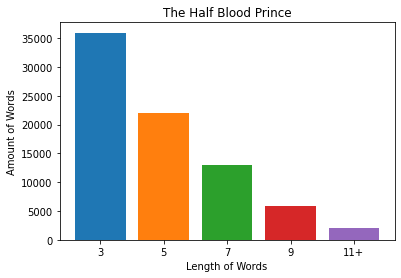

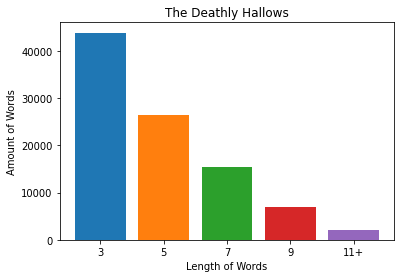

In [31]:
for i in bookList:
    output = [0,0,0,0,0]
    data = open("out/"+i, "r", encoding="utf-8").readlines()
    for l in data:
        newdata= l.replace("\n","").split(" ")
        for j in newdata:
            if len(j) == 3:
                output[0]+=1
            elif len(j) == 5:
                output[1]+=1
            elif len(j) == 7:
                output[2]+=1
            elif len(j) == 9:
                output[3]+=1
            elif len(j) == 11:
                output[4]+=1
    plt.bar("3",output[0])
    plt.bar("5",output[1])
    plt.bar("7",output[2])
    plt.bar("9",output[3])
    plt.bar("11+",output[4])
    plt.xlabel("Length of Words")
    plt.ylabel("Amount of Words")
    plt.title(i[9:-4])
    plt.show()

1. All the books are looped through. The data is read from these book's files and put into the data variable.
2. Characters variable is made and set to 0 as default.
3. Each line is looped through and the length of it is added to characters.
4. Characters is added to a graph at the end before looping again.
5. All character data is plotted on graph.

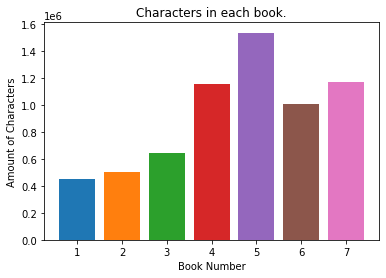

In [32]:
for i in bookList:
    characters = 0
    data = open("out/"+i, "r", encoding="utf-8").readlines()
    for l in data:
        characters+=len(l)
    plt.bar(i.split("Book ")[1].split(" -")[0],characters)
plt.xlabel("Book Number")
plt.ylabel("Amount of Characters")
plt.title("Characters in each book.")
plt.show()

1. All the books are looped through.
2. Output is set equal to a list of 7 zeros for later addiction.
3. Data variable is created which contains each line for every book looped through.
4. Each line of data variable is looped through.
5. Each line gets it's \n replaced and is split by their spaces.
6. Each one of splits is then looped through one more for statement which checks each word to see if it contains the full name or part of the name and adds to that name's index.
7. Data is then plotted on a graph from the output variable.

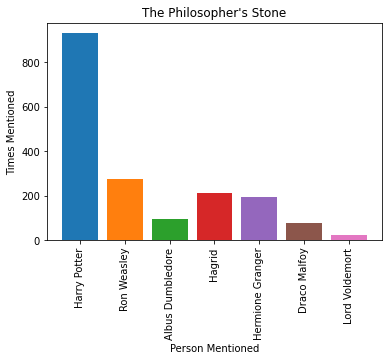

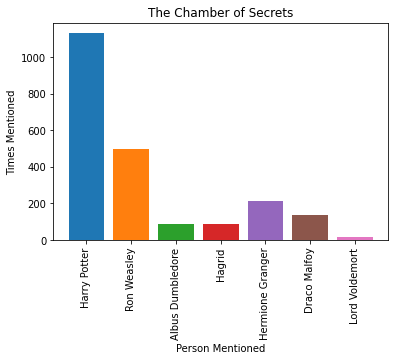

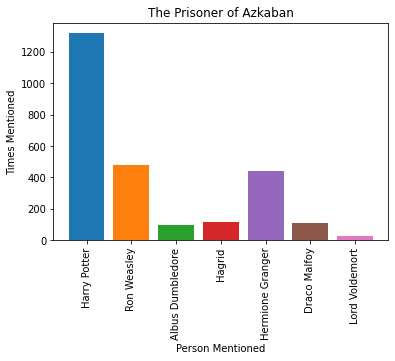

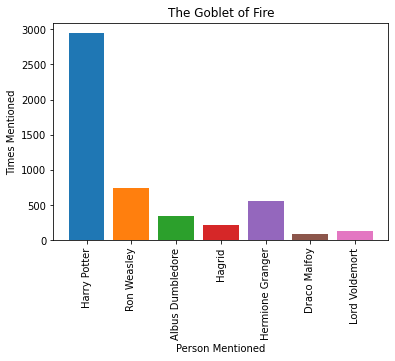

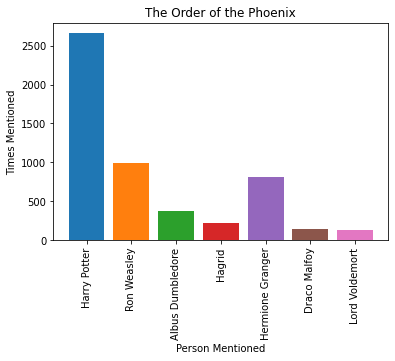

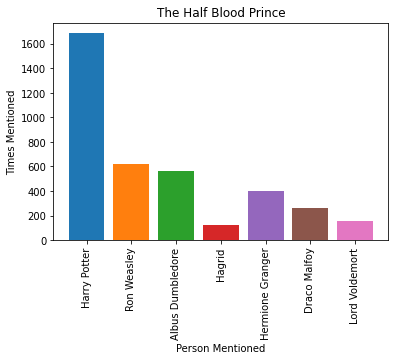

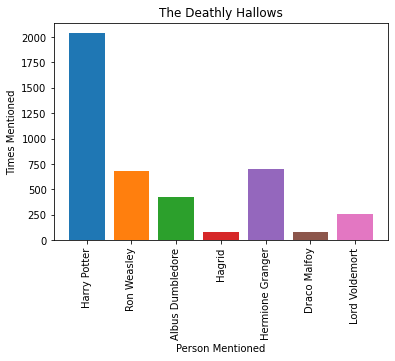

In [37]:
for i in bookList:
    output = [0,0,0,0,0,0,0]
    data = open("out/"+i, "r", encoding="utf-8").readlines()
    for l in data:
     newdata= l.replace("\n","").split(" ")
     for j in range(len(newdata)):
          if newdata[j] == "Harry" and newdata[j+1] == "Potter":
               output[0]+=1
          elif newdata[j] == "Harry":
               output[0]+=1
          elif newdata[j] == "Potter":
               output[0]+=1
          if newdata[j] == "Ron" and newdata[j+1] == "Weasley":
               output[1]+=1
          elif newdata[j] == "Ron":
               output[1]+=1
          elif newdata[j] == "Weasley":
               output[1]+=1
          if newdata[j] == "Albus" and newdata[j+1] == "Dumbledore":
               output[2]+=1
          elif newdata[j] == "Albus":
               output[2]+=1
          elif newdata[j] == "Dumbledore":
               output[2]+=1
          if newdata[j] == "Hagrid":
               output[3]+=1
          if newdata[j] == "Hermione" and newdata[j+1] == "Granger":
               output[4]+=1
          elif newdata[j] == "Hermione":
               output[4]+=1
          elif newdata[j] == "Granger":
               output[4]+=1
          if newdata[j] == "Draco" and newdata[j+1] == "Malfoy":
               output[5]+=1
          elif newdata[j] == "Draco":
               output[5]+=1
          elif newdata[j] == "Malfoy":
               output[5]+=1
          if newdata[j] == "Lord" and newdata[j+1] == "Voldemort":
               output[6]+=1
          elif newdata[j] == "Voldemort":
               output[6]+=1
    plt.bar("Harry Potter",output[0])
    plt.bar("Ron Weasley",output[1])
    plt.bar("Albus Dumbledore",output[2])
    plt.bar("Hagrid",output[3])
    plt.bar("Hermione Granger",output[4])
    plt.bar("Draco Malfoy",output[5])
    plt.bar("Lord Voldemort",output[6])
    plt.xticks(rotation = 90)
    plt.xlabel("Person Mentioned")
    plt.ylabel("Times Mentioned")
    plt.title(i[9:-4])
    plt.show()